### **Goal:** Create a regression model for predicting housing prices

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
raw_data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"


In [4]:
df = pd.read_csv(raw_data)
raw_df = df.copy()

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Data preparation

In [6]:
df.ocean_proximity.nunique()

5

In [7]:
 df = df[df["ocean_proximity"] == '<1H OCEAN']#.unique()

In [8]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

In [9]:
df = df[columns]

In [10]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20502,-118.68,34.33,45.0,121.0,25.0,67.0,27.0,2.9821,325000.0
20503,-118.75,34.33,27.0,534.0,85.0,243.0,77.0,8.2787,330000.0
20504,-118.73,34.29,11.0,5451.0,736.0,2526.0,752.0,7.3550,343900.0
20505,-118.72,34.29,22.0,3266.0,529.0,1595.0,494.0,6.0368,248000.0


<Axes: >

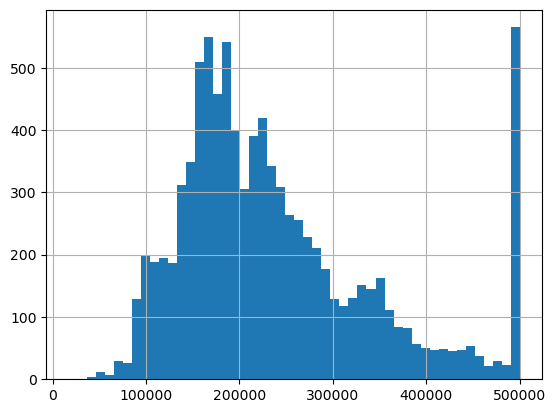

In [11]:
df.median_house_value.hist(bins=50)

In [12]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,9136.000000,9136.000000,9136.000000,9136.000000,9034.000000,9136.000000,9136.000000,9136.000000,9136.000000
mean,-118.847766,34.560577,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
std,1.588888,1.467127,11.644453,2160.463696,427.911417,1185.848357,392.280718,2.001223,106124.292213
min,-124.140000,32.610000,2.000000,11.000000,5.000000,3.000000,4.000000,0.499900,17500.000000
25%,-118.500000,33.860000,20.000000,1464.000000,303.000000,857.750000,293.000000,2.864900,164100.000000
50%,-118.275000,34.030000,30.000000,2108.000000,438.000000,1247.000000,421.000000,3.875000,214850.000000
75%,-118.000000,34.220000,37.000000,3141.000000,652.000000,1848.000000,617.000000,5.180500,289100.000000
max,-116.620000,41.880000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
# Q1
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9136 entries, 701 to 20506
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           9136 non-null   float64
 1   latitude            9136 non-null   float64
 2   housing_median_age  9136 non-null   float64
 3   total_rooms         9136 non-null   float64
 4   total_bedrooms      9034 non-null   float64
 5   population          9136 non-null   float64
 6   households          9136 non-null   float64
 7   median_income       9136 non-null   float64
 8   median_house_value  9136 non-null   float64
dtypes: float64(9)
memory usage: 713.8 KB


In [14]:
df.isnull().mean()

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.011165
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
dtype: float64

In [15]:
# Q2
df.population.median()

1247.0

In [16]:
raw_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Prepare and split

In [19]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [20]:
print("Size of part of the data frame")
print("Train: ", n_train)
print("Validation: ", n_val)
print("Test: ", n_test)

Size of part of the data frame
Train:  5482
Validation:  1827
Test:  1827
